In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import sys
# sys.path.insert(0, 'E:/MyRepositories/JobProjects/Аналитика_базы_данных/functions/')
sys.path.insert(0, '../functions/')
from out_dataframe import MyFrame


In [2]:
warnings.simplefilter(action="ignore", category=Warning)
# 'E:\MyRepositories\JobProjects\Аналитика_базы_данных\functions\out_dataframe.py'

In [3]:
product = "водяной насос"  # изделие по которому будут строится графики
client = 'ЯМЗ'  # потребитель

In [10]:
# создаем датафреймы по годам
client_asp = f"{client} - АСП"   # потребитель АСП
client_gp = f"{client} - эксплуатация"  # потребитель ГП

df6 = MyFrame(2025, client_gp, product).get_frame()
df5 = MyFrame(2025, client_asp, product).get_frame()
df4 = MyFrame(2024, client_gp, product).get_frame()
df3 = MyFrame(2024, client_asp, product).get_frame()
df2 = MyFrame(2023, client_gp, product).get_frame()
df1 = MyFrame(2023, client_asp, product).get_frame()

In [11]:
# создаем сводный датафрейм из датафреймов по годам
# df = pd.concat([df1, df2, df3, df4])
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1367 entries, 159 to 317
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Месяц регистрации                            1367 non-null   datetime64[ns]
 1   Обозначение изделия                          1367 non-null   object        
 2   Дата изготовления изделия                    1106 non-null   datetime64[ns]
 3   Транспортное средство (установка)            967 non-null    object        
 4   Пробег, наработка                            1367 non-null   int32         
 5   Причины возникновения дефектов               1191 non-null   object        
 6   Пояснения к причинам возникновения дефектов  944 non-null    object        
 7   Поставщик дефектного комплектующего          1191 non-null   object        
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 90.8+ KB


In [13]:
df[df['Обозначение изделия'].str.contains('факт')]['Обозначение изделия']

Series([], Name: Обозначение изделия, dtype: object)

In [14]:
df['Обозначение изделия'] = df['Обозначение изделия'].replace({'245-1307010-А1-11       (факт 240-1307010-А1)': '240-1307010-А1'})

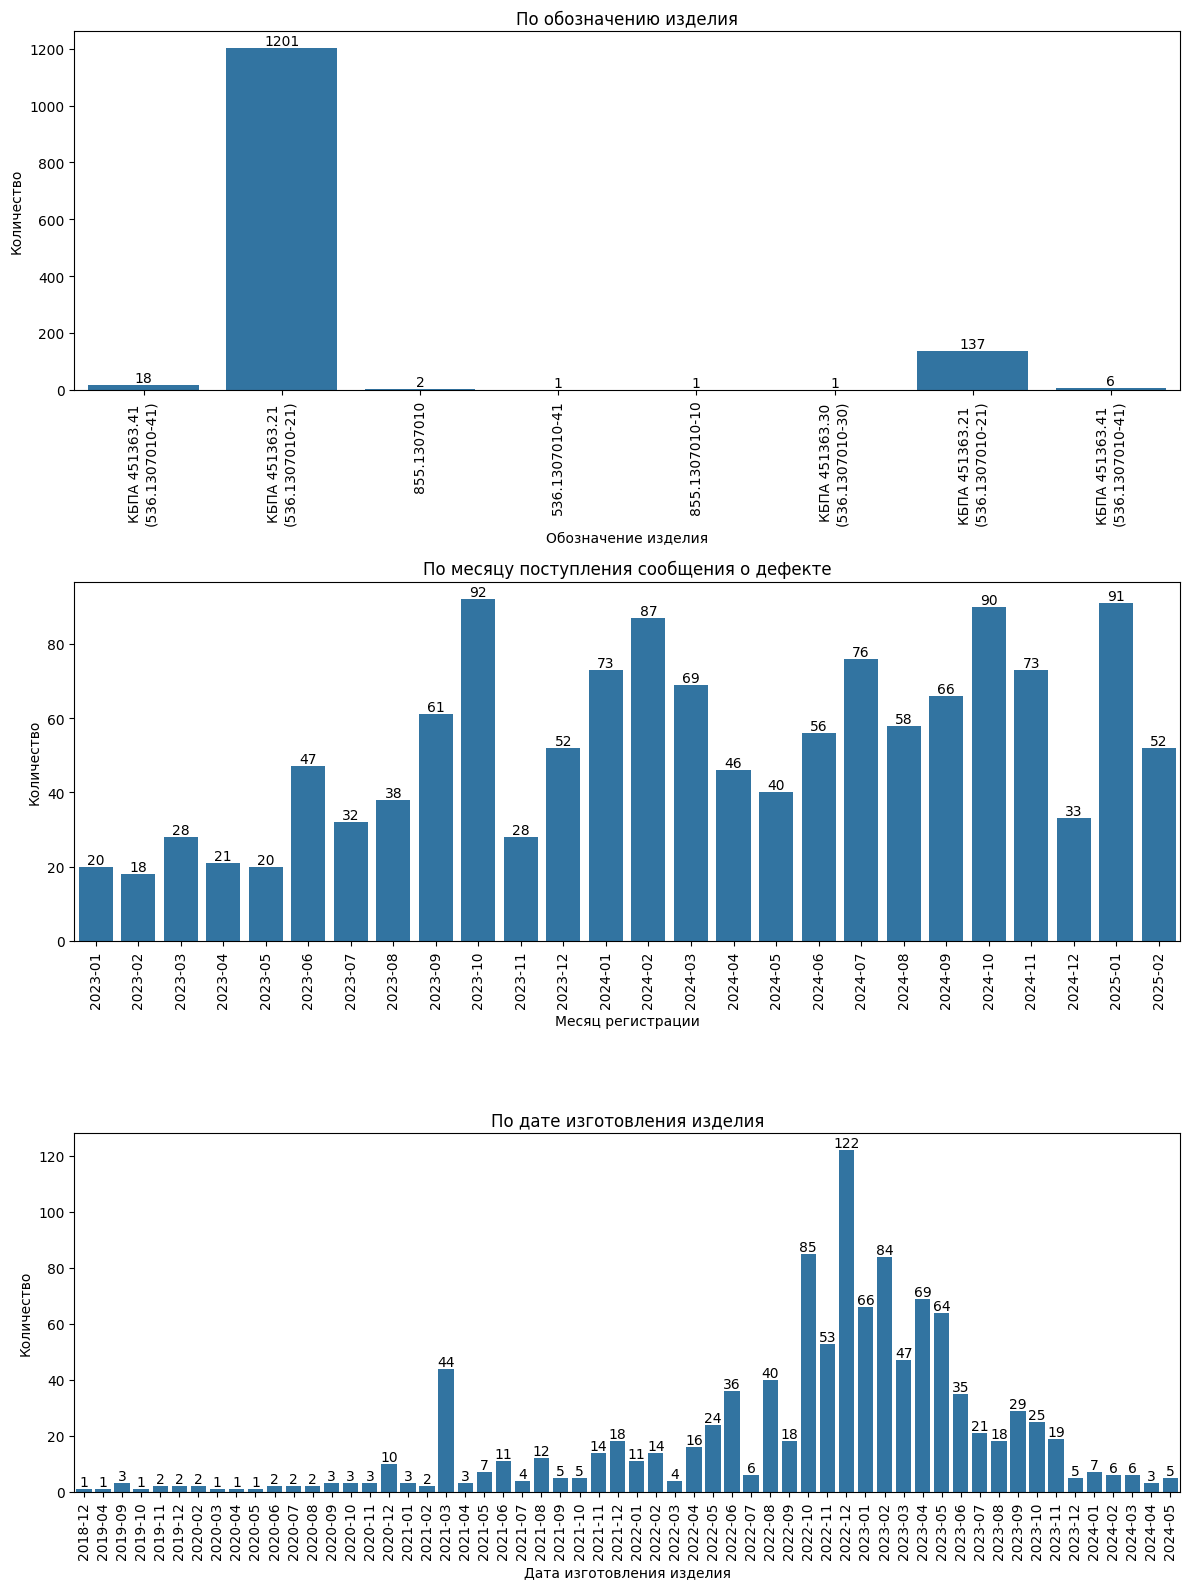

In [15]:
# Создание фигуры с несколькими графиками
fig, ax = plt.subplots(3, figsize=(12, 16))

# Построение графика countplot по обозначению изделия
ax_1 = sns.countplot(data=df, x='Обозначение изделия', ax=ax[0])
ax_1.bar_label(ax_1.containers[0], label_type='edge')
ax[0].set_title('По обозначению изделия')
ax[0].set_ylabel("Количество")
# Поворот подписей по оси Х на 90 градусов
ax[0].tick_params(axis='x', labelrotation=90)

# Сортируем датафрейм по месяцу регистрации
df = df.sort_values(by='Месяц регистрации')
# Изменяем формат вывода даты регистрации на "гггг-мм"
df['Месяц регистрации'] = df['Месяц регистрации'].dt.strftime('%Y-%m')
# Построение графика countplot по месяцу поступления сообщения
ax_2 = sns.countplot(data=df, x='Месяц регистрации', ax=ax[1])
ax_2.bar_label(ax_2.containers[0], label_type='edge')
ax[1].set_title('По месяцу поступления сообщения о дефекте')
ax[1].set_ylabel("Количество")
ax[1].tick_params(axis='x', labelrotation=90)

# Удаляем пустые строки в столбце 'Дата изготовления изделия'
df_new = df.dropna(subset=['Дата изготовления изделия'])
# Сортируем по дате изготовления изделия
df_new = df_new.sort_values(by='Дата изготовления изделия')
# Изменяем формат вывода даты регистрации на "гггг-мм"
df_new["Дата изготовления изделия"] = df_new["Дата изготовления изделия"].dt.strftime('%Y-%m')
# Построение графика countplot по дате изготовления изделия
ax_3 = sns.countplot(data=df_new, x='Дата изготовления изделия', ax=ax[2])
ax_3.bar_label(ax_3.containers[0], label_type='edge')
ax[2].set_title('По дате изготовления изделия')
ax[2].set_ylabel("Количество")
ax_3.tick_params(axis='x', labelrotation=90)

# Установка расстояния между подграфиками
plt.tight_layout();

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_графики 2022-2024.png')